# 104 In-Class Assignment: Transformations & Robotics

<img src="https://people.gnome.org/~mathieu/libart/art-affines.png">

Image from: https://people.gnome.org/~mathieu/libart/libart-affine-transformation-matrices.html
    

### Agenda for today's class

1. Review of Pre-Class Assignment
1. Homework 1 Review
1. [Affine Transform Review](#Affine_Transforms)
1. [Fractals](#Fractals)
1. [Robot 1: Pick and Place](#Pick_and_Place)
1. [Robot 2: Odd Clock](#Odd_Clock)


----
<a name="Affine_Transforms"></a>
## 3. Affine Transforms

In this section, we are going to explore different types of transformation matrices. 
The following code is designed to demonstrate the properties of some different transformation matrices.  

&#9989; **<font color=red>DO THIS:</font>** Review the following code.  

In [1]:
#Some python packages we will be using
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D #Lets us make 3D plots
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

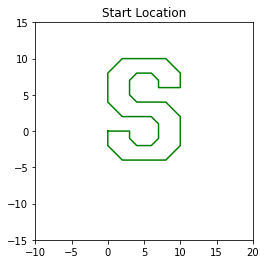

In [2]:
# Define some points
x = [0.0,  0.0,  2.0,  8.0, 10.0, 10.0, 8.0, 4.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 10.0, 
     10.0,  8.0,  2.0, 0.0, 0.0, 2.0, 6.0, 7.0,  7.0,  6.0,  4.0,  3.0, 3.0, 0.0]
y = [0.0, -2.0, -4.0, -4.0, -2.0,  2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 8.0, 7.0, 6.0,  6.0,
     8.0, 10.0, 10.0, 8.0, 4.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0, -1.0, 0.0, 0.0]
con = [ 1.0 for i in range(len(x))] 

p = np.matrix([x,y,con])


mp = p.copy()

#Plot Points
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

### Example Scaling Matrix

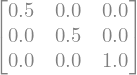

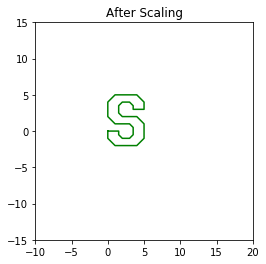

In [3]:
#Example Scaling Matrix

#Define Matrix
scale = 0.5  #The amount that coordinates are scaled.
S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])

#Apply matrix

mp = p.copy()
mp = S*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Scaling')

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(S)

### Example Translation Matrix

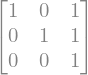

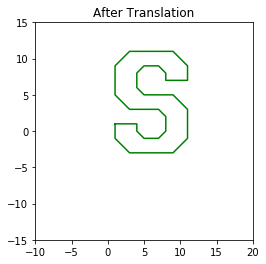

In [4]:
#Example Translation Matrix

#Define Matrix
dx = 1  #The amount shifted in the x-direction
dy = 1  #The amount shifted in the y-direction
T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = T*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Translation')

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(T)

### Example Reflection Matrix

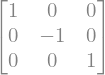

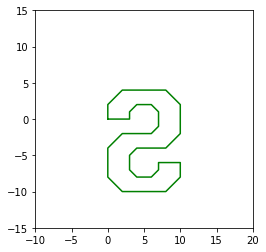

In [5]:
#Example Reflection Matrix

#Define Matrix
Re = np.matrix([[1,0,0],[0,-1,0],[0,0,1]]) ## Makes all y-values opposite so it reflects over the x-axis.

#Apply matrix

mp = p.copy()

mp = Re*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(Re)

### Example Rotation Matrix

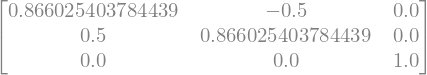

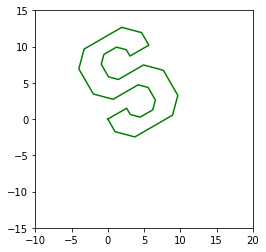

In [6]:
#Example Rotation Matrix

#Define Matrix
degrees = 30
theta = degrees * np.pi / 180  ##Make sure to always convert from degrees to radians. 

# Rotates the points 30 degrees counterclockwise.
R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]]) 

#Apply matrix
mp = p.copy()

mp = R*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(R)

### Example Shear Matrix

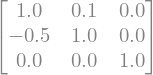

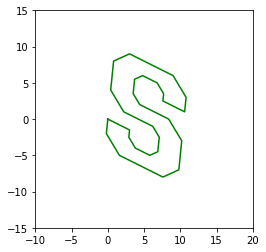

In [7]:
#Example Shear Matrix

#Define Matrix
shx = 0.1
shy = -0.5
SH = np.matrix([[1,shx,0], [shy,1,0], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = SH*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

sym.Matrix(SH)

### Combine Transforms

We have five transforms $R$, $S$, $T$, $Re$, and $SH$ 

&#9989; **<font color=red>DO THIS:</font>** Construct a ($3 \times 3$) transformation Matrix (called $M$) which combines these five transforms into a single matrix. You can choose different orders for these five matrix, then compare your result with other students. 

Put your answer here

In [8]:
#put your code for your answer here.

### Interactive Example

In [9]:
from ipywidgets import interact,interact_manual

def affine_image(angle=0,scale=1.0,dx=0,dy=0, shx=0, shy=0):
    theta = -angle/180  * np.pi
    
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='green')
    
    S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])
    SH = np.matrix([[1,shx,0], [shy,1,0], [0,0,1]])
    T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])
    R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    
    #Full Transform
    FT = T*SH*R*S;
    #Apply Transforms
    p2 =  FT*p;
    
    #Plot Output
    plt.plot(p2[0,:].tolist()[0],p2[1,:].tolist()[0], color='black')
    plt.axis('scaled')
    plt.axis([-10,20,-15,15])
    return sym.Matrix(FT)

In [10]:
interact_manual(affine_image, angle=(-180,180), scale_manual=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

interactive(children=(IntSlider(value=0, description='angle', max=180, min=-180), FloatSlider(value=1.0, descr…

The following command can also be used but it may be slow on some peoples computers.

In [11]:
#interact(affine_image, angle=(-180,180), scale=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

&#9989; **<font color=red>DO THIS:</font>**  Using the above interactive enviornment to see if you can figure out the transformation matrix to make the following image:

<img src="https://lh6.googleusercontent.com/_0-jr5Z0DQzqVM3TD3Xa3QWC43PBT6ru5M-B-_7dfbib2SSvkNkxtioBFaU__jTvEJMMG9SAVg=w380">

&#9989; **<font color=red>Questions:</font>** What where the input values?


Put your answer here:

r = 

scale = 

dx = 

dy = 

shx = 

shy = 

----
<a name="Fractals"></a>
## 3. Fractals


In this section we are going to explore using transformations to generate fractals.  Consider the following set of linear equations.  Each one takes a 2D point as input, applies a $2 \times 2$ transform, and then also translates by a $2 \times 1$ translation matrix

$$ 
T_1:\left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03  \\
    -0.03 & 0.86 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
1.5
\end{matrix}
\right]
: probability =  0.83 $$ 

$$ 
T_2: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.2 & -0.25  \\
    0.21 & 0.23 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
1.5
\end{matrix}
\right]
: probability =  0.08 $$ 

$$ 
T_3 : \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.15 & 0.27  \\
    0.25 & 0.26 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
0.45
\end{matrix}
\right]
: probability =  0.08 $$ 

$$ 
T_4: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0 & 0  \\
    0 & 0.17 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 
 \end{matrix}
\right] +
\left[\begin{matrix}
0\\
0
\end{matrix}
\right] : probability =  0.01 $$

We want to write a program that use the above transformations to "randomly" generate an image.  We start with a point at the origin (0,0) and then randomly pick one of the above transformation based on their probability, update the point position and then randomly pick another point.  Each matrix adds a bit of rotation and translation with $T_4$ as a kind of restart.    


To try to make our program a little easier, lets rewrite the above equations to make a system of  "equivelent" equations of the form $Ax=b$ with only one matrix.   We do this by adding an additional variable variable $z=1$.  For example, verify that the following equation is the same as equation for $T1$ above:

$$ 
T_1: \left[ \begin{matrix}
    x_1 \\
    y_1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    0.86 & 0.03 & 0 \\
    -0.03 & 0.86 & 1.5
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_0 \\
    y_0 \\
    1
 \end{matrix}
\right] 
$$ 
Please NOTE that we do not change the value for $z$, and it is always be $1$.

&#9989; **<font color=red>DO THIS:</font>** Verify the $Ax=b$ format will generate the same answer as the $T1$ equation above.

The following is some pseudocode that we will be using to generate the Fractals:

1. Let $x = 0$, $y = 0$, $z=1$
2. Use a random generator to select one of the affine transformations $T_i$ according to the given probabilities.
3. Let $(x',y') = T_i(x,y,z)$.
4. Plot $(x', y')$
5. Let $(x,y) = (x',y')$
6. Repeat Steps 2, 3, 4, and 5 one thousand times. 

The following python code implements the above pseudocode with only the $T1$ matrix:

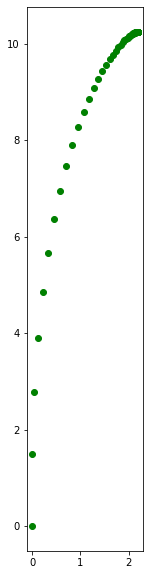

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

T1 = np.matrix([[0.86, 0.03, 0],[-0.03, 0.86, 1.5]])
#####Start your code here #####
T2 = T1 
T3 = T1
T4 = T1
#####End of your code here#####       

prob = [0.83,0.08,0.08,0.01]

I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])

fig = plt.figure(figsize=[10,10])
p = np.matrix([[0.],[0],[1]])
plt.plot(p[0],p[1], 'go');
for i in range(1,1000):
    ticket = np.random.random();
    if (ticket < prob[0]):
        T = T1
    elif (ticket < sum(prob[0:2])):
        T = T2
    elif (ticket < sum(prob[0:3])):
        T = T3
    else:
        T = T4
    p[0:2,0] = T*p    
    plt.plot(p[0],p[1], 'go');
plt.axis('scaled');

&#9989; **<font color=red>DO THIS:</font>** Modify the above code to add in the $T2$, $T3$ and $T4$ transforms.  

&#9989; **<font color=red>QUESTION:</font>**  Describe in words for the actions performed by $T_1$, $T_2$, $T_3$, and $T_4$. 

$T_1$: Put your answer here

$T_2$: Put your answer here

$T_3$: Put your answer here


$T_4$: Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Using the same ideas to design and build your own fractal.  You are welcome to get inspiration from the internet. Make sure you document where your inspiration comes from.  Try to build something fun, unique and different.  Show what you come up with with your instructors. 

&#9989; **<font color=red>Questions:</font>** Did you get the same result with others? You can compare the matrix $M$ to see the difference. If not, can you explain why it happens?

## The Kinematics of Robotics

<img src="https://cdn.pixabay.com/photo/2013/07/13/12/04/android-159109__340.png" alt="Cartoon Robot" width=20%>

Image from: https://pixabay.com/images/search/toy%20robot/

Today, we will calculate the forward kinematics of some 3D robots. This means we would like to come up with a set of transformations such that we can know the $x,~y,~z$ coordinates of the end effector with respect to the world coordinate system which is at the base of the robot.  

----
<a name="Pick_and_Place"></a>
## 2. Robot 1: Pick and Place 

Consider the robot depicted in the following image. 

<img alt="Picture of a pick-and-place robot (see text)" src="http://cfnewsads.thomasnet.com/images/large/489/489457.jpg" width="50%">
   
This style of robot is often called a "pick-and-place" robot. 
It has two motors that rotate around the z-axis to move the end effector in the $x-y$-plane; one "linear actuator" which moves up-and-down in the $z$-direction; and then finally a third rotating "wrist" joint that turns the "hand" of the robot.
Let's model our robot using the following system diagram:


<img alt="System diagram of pick-and-place robot" src="https://lh4.googleusercontent.com/z5P5JHOmmn3GzXulvHwtqKeLSeUILEHe_9yndHp33gZ1m2mqblR8nmHgNDDzHq3W38jJBdh-Tg=w740" width="35%">

**NOTE:** The origin for this robot is located at the base of the first "tower" and is in-line with the first joint.  The $x$-direction goes from the origin to the right and the $z$-axis goes from the origin upwards. 

This is a little more tricky than the 2D case where everything was rotating around the axes that projects out of the $x-y$ plane.  
In 2D we only really worry about one axis of rotation. 
However in 3D we can rotate around the $x$, $y$, and $z$ axis. 
The following are the 3D transformation matrices that combine rotation and translations:



## X-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    1 & 0 & 0 & dx \\
    0 & cos(q) & -sin(q)  & dy \\
    0 & sin(q) & cos(q)  & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 



## Y-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(q) & 0 & sin(q) & dx \\
    0 & 1 & 0 & dy \\
    -sin(q) & 0 & cos(q) & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 



## Z-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(q) & -sin(q) & 0 & dx \\
    sin(q) & cos(q) & 0 & dy \\
    0 & 0 & 1 & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_1$, which represents a coordinate system that is located at the top of the first "tower" (robot's sholder) and moves by rotating around the $z$-axis by $\theta_1$ degrees. Represent your matrix using ```sympy``` and the provided symbols:

In [13]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

In [14]:
#Use the following symbols

q1,q2,d4,q4,v1,v2,a1,a2 = sym.symbols('\Theta_1, \Theta_2, d_4, \Theta_4, V_1, V_2,A_1,A_2', negative=False)

In [15]:
#put your answer here
q1

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_2$, which represents a coordinate system that is located at the "elbow" joint between the two rotating arms and rotates with the second arm around the $z$-axis by $\theta_2$ degrees. Represent your matrix using ```sympy``` and the symbols provided in question a:

In [16]:
#put your answer here

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_3$, which represents a coordinate translation from the "elbow" joint all the way to the horizontal end of the robot arm above the wrist joint.  Note: there is no rotation in this transformation.  Represent your matrix using ```sympy``` and the symbols provided in question a:

In [17]:
#put your answer here

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_4$, which represents a coordinate system that is located at the tip of the robot's "hand" and rotates around the $z$-axis by $\theta_4$. This one is a little different, the configuration is such that the hand touches the table when $d_4=0$ so the translation component for the matrix in the z axis is $d_4-V_1-V_2$. 

In [18]:

#Put your code here


In [19]:
#Plot combined transformed points
mp = p.copy()
mp = M*mp
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

NameError: name 'M' is not defined

**<font color=red>Question:</font>** Rewrite the joint transformation matrices from questions a - d as numpy matrices with discrete (instead of symbolic) values.  Plug in your transformations in the code below and use this to simulate the robot:

**Hint.** If you copy an paste from above you need to convert all of the ``sympy`` syntax into ``numpy`` syntax.

In [ ]:
from ipywidgets import interact, interact_manual
from mpl_toolkits.mplot3d import Axes3D

def Robot_Simulator(theta1=0,theta2=-0,d4=0,theta4=0):

    #Convert from degrees to radians
    q1 = theta1/180 * np.pi
    q2 = theta2/180 * np.pi
    q4 = theta4/180 * np.pi

    #Define robot geomitry
    v1 = 4 
    v2 = 0
    a1 = 2 
    a2 = 2 

    #Define your transfomraiton matrices here. 
    J1 = np.matrix([[1, 0, 0, 0 ], 
                    [0, 1, 0, 0 ], 
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

    J2 = np.matrix([[1, 0, 0, 0 ], 
                    [0, 1, 0, 0 ], 
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

    J3 = np.matrix([[1, 0, 0, 0 ], 
                    [0, 1, 0, 0 ], 
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

    J4 = np.matrix([[1, 0, 0, 0 ], 
                    [0, 1, 0, 0 ], 
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

    
    #Make the rigid end effector
    p = np.matrix([[-0.5,0,0, 1], [-0.5,0,0.5,1], [0.5,0,0.5, 1], [0.5,0,0,1],[0.5,0,0.5, 1], [0,0,0.5,1], [0,0,V1+V2,1]]).T
    
    #Propogate and add joint points though the simulation
    p = np.concatenate((J4*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J3*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J2*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J1*p, np.matrix([0,0,0,1]).T), axis=1 )
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(p[0,:].tolist()[0],(p[1,:]).tolist()[0], (p[2,:]).tolist()[0], s=20, facecolors='blue', edgecolors='r')
    ax.scatter(0,0,0, s=20, facecolors='r', edgecolors='r')
    ax.plot(p[0,:].tolist()[0],(p[1,:]).tolist()[0], (p[2,:]).tolist()[0])
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    ax.set_zlim([0,6])
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')    
    ax.set_zlabel('z-axis') 

    plt.show()
    
target = interact_manual(Robot_Simulator, theta1=(-180,180), theta2=(-180,180), d4=(0,6), theta4=(-180,180)); ##TODO: Modify this line of code

&#9989; **<font color=red>Question:</font>** Can we change the order of the transformation matrices? Why? You can try and see what happens.

Put your answer to the above question here.

----
<a name="Odd_Clock"></a>
## 6. Robot 2: Odd Clock 

Consider the clock depicted in the following image. 

<img alt="Picture of an 'odd clock' with the minute hand attached to the end of the hour hand" src="https://hackaday.com/wp-content/uploads/2015/05/hihclock.jpg" width=80%>

from: [Hackaday](https://hackaday.com/2015/05/26/odd-clock-moves-minute-hand-to-hour-hand/)


Instead of a standard clock--which has independent hour and minute hands--this clock connects the minute hand at the end of the hour hand. Here is a video showing the sped-up clock motion: 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("bowLiSlm_gA",width=640,height=360, mute=1)

The following code is an animated traditional clock which uses the function as a trick to animate things in jupyter:

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf();
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

Lets see a standard analog clock run at high speed

In [ ]:
import numpy as np
'''
Analog clock plotter with time input as seconds
'''
def analog_clock(tm=0):

    #Convert from time to radians
    a_minutes = -tm/(60*60) * np.pi * 2
    a_hours = -tm/(60*60*12) * np.pi * 2

    #Define clock hand sizees
    d_minutes = 4
    d_hours = 3 
    arrow_width=0.5
    arrow_length=1

    # Set up figure
    fig = plt.gcf()
    ax = fig.gca();
    ax.set_xlim([-15,15]);
    ax.set_ylim([-10,10]);
    ax.scatter(0,0, s=15000, color="navy"); #Background Circle
    plt.axis('off');
        
    # Calculation Minute hand transformation matrix
    J2 = np.matrix([[np.cos(a_minutes), -np.sin(a_minutes)], 
                    [np.sin(a_minutes), np.cos(a_minutes)]] )
    pm = np.matrix([[0,d_minutes], [-arrow_width,d_minutes], [0,arrow_length+d_minutes], [arrow_width,d_minutes], [0,d_minutes]] ).T;
    pm = np.concatenate((J2*pm, np.matrix([0,0]).T), axis=1 );
    ax.plot(pm[0,:].tolist()[0],(pm[1,:]).tolist()[0], color='cyan', linewidth=2);

    # Calculation Hour hand transformation matrix    
    J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours)], 
                    [np.sin(a_hours), np.cos(a_hours)]] )
    ph = np.matrix([[0,d_hours], [0,d_hours], [-arrow_width,d_hours], [0,arrow_length+d_hours], [arrow_width,d_hours], [0,d_hours]]).T;
    ph = np.concatenate((J1*ph, np.matrix([0,0]).T), axis=1 );
    ax.plot(ph[0,:].tolist()[0],(ph[1,:]).tolist()[0], color='yellow', linewidth=2);

In [ ]:
#Run the clock for about 5 hours at 100 times speed so we can see the hands move
for tm in range(0,60*60*5, 100):
    analog_clock(tm);
    show_animation();

For the following few questions, consider the transformation matrix $J_1$ redefined below with an angle of 5 hours out of 12. 

In [ ]:
import sympy as sym
import numpy as np
sym.init_printing(use_unicode=True)

a_hours = 5/12 * 2 * np.pi
J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours)], 
                [np.sin(a_hours), np.cos(a_hours)]] )

sym.Matrix(J1)

&#9989; **<font color=red>Question:</font>**  Using code, show that the transpose of $J_1$ is also the inverse of $J_1$, then explain how the code demonstrates the answer. 

In [ ]:
#Put your code here. 


**<font color=red>Explain your answer here.</font>**

&#9989; **<font color=red>Question:</font>**  Given the trigonometric identity $cos^2(\theta) + sin^2(\theta) = 1$, prove by construction--using either Python or $\LaTeX$/```Markdown``` or ```sympy``` (if you are feeling adventurous)--that the transpose of the $J_1$ matrix is also the inverse for ANY angle ```a_hours``` $\in [0, 2\pi]$. 

**<font color=red>Put your prof here.</font>**

Now consider the following code which attempts to connect the hands on the clock together to make the Odd Clock shown in the video above.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf();
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

In [ ]:
import numpy as np

def odd_clock(tm=0):

    #Convert from time to radians
    #a_seconds = -tm/60 * np.pi * 2
    a_minutes = -tm/(60*60) * np.pi * 2
    a_hours = -tm/(60*60*12) * np.pi * 2

    #Define robot geomitry
    #d_seconds = 2.5  
    d_minutes = 2
    d_hours = 1.5 
    arrow_width=0.5
    arrow_length=1

    # Set up figure
    fig = plt.gcf()
    ax = fig.gca();
    ax.set_xlim([-15,15]);
    ax.set_ylim([-10,10]);
    plt.axis('off');
    
    #Define the arrow at the end of the last hand 
    #p = np.matrix([[0,d_minutes,1], [0,0,1]]).T
    p = np.matrix([[0,d_minutes,1], [-arrow_width,d_minutes,1], [0,arrow_length+d_minutes,1], [arrow_width,d_minutes,1 ], [0,d_minutes,1 ], [0,0,1]] ).T;
    
    # Calculation Second hand transformation matrix     
    J2 = np.matrix([[np.cos(a_minutes), -np.sin(a_minutes), 0 ], 
                    [np.sin(a_minutes), np.cos(a_minutes), d_hours ], 
                    [0, 0, 1]])
    p = np.concatenate((J2*p, np.matrix([0,0,1]).T), axis=1 )
    
    J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours), 0 ], 
                    [np.sin(a_hours), np.cos(a_hours), 0 ], 
                    [0, 0, 1]])
    p = np.concatenate((J1*p, np.matrix([0,0,1]).T), axis=1 )

    ax.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    ax.plot(p[0,:].tolist()[0],(p[1,:]).tolist()[0])


In [ ]:
#Run the clock for about 5 hours at 100 times speed so we can see the hands move
for tm in range(0,60*60*5, 100):
    odd_clock(tm);
    show_animation();

&#9989; **<font color=red>Question:</font>** Using the given point ($p$) written in "minutes" coordinates (**on line 26 of the above code**) and the above transformation matrices ($J_1,J_2$), write down the equation to transform $p$ into world coordinates $p_w$.

**<font color=red>Put the answer to the above question here</font>**

&#9989; **<font color=red>Question:</font>** Notice the above ```odd_clock``` function has variables ```d_seconds``` and ```a_seconds``` commented out.  Use these variables and modify the above code to add a "seconds" hand on the tip of the minute hand such that the seconds hand moves around the minute hand just like the minute hand moves around the hour hand. If you have trouble, use the following cell to explain your thought process and where you are getting stuck.